In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
X = dataset.iloc[:, :-1].values

In [4]:
y = dataset.iloc[:, -1].values

In [8]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
sc.fit_transform(X)

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [10]:
# training the SOM
from minisom import MiniSom

In [11]:
som = MiniSom(x= 10, y=10, input_len=15, sigma=1.0,learning_rate=0.5)

In [12]:
som.random_weights_init(X)

In [13]:
som.train_random(data=X, num_iteration=100)

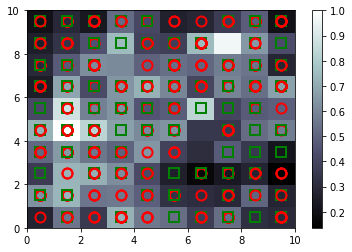

In [17]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [18]:
# finding the frauds
mappings = som.win_map(X)

In [20]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis =0)
frauds = sc.inverse_transform(frauds)

In [21]:
frauds

array([[3.91504507e+12, 1.00000000e+00, 1.85912500e+03, 1.63800000e+01,
        3.00000000e+00, 1.70000000e+02, 3.30000000e+01, 7.12500000e+00,
        1.00000000e+00, 1.00000000e+00, 1.34000000e+02, 0.00000000e+00,
        5.00000000e+00, 5.20000000e+05, 5.01000010e+07],
       [3.91511574e+12, 1.00000000e+00, 1.29919500e+03, 3.05620000e+02,
        5.00000000e+00, 1.05000000e+02, 4.10000000e+01, 1.66725000e+01,
        0.00000000e+00, 1.00000000e+00, 1.34000000e+02, 1.00000000e+00,
        5.00000000e+00, 4.00000000e+05, 8.00001000e+05],
       [3.89812443e+12, 1.00000000e+00, 1.38830500e+03, 3.50000000e+01,
        3.00000000e+00, 1.05000000e+02, 6.50000000e+01, 3.91875000e+01,
        1.00000000e+00, 1.00000000e+00, 2.01000000e+02, 1.00000000e+00,
        5.00000000e+00, 2.80000000e+05, 2.11000010e+07],
       [3.89829574e+12, 0.00000000e+00, 1.37168000e+03, 2.94000000e+02,
        3.00000000e+00, 1.83000000e+02, 6.50000000e+01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+0

In [22]:
customers = dataset.iloc[:, :-1].values

In [25]:
pd.DataFrame(customers)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15776156.0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0
1,15739548.0,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0
2,15662854.0,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0
3,15687688.0,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0
4,15715750.0,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223.0,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0
686,15769980.0,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0
687,15675450.0,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0
688,15776494.0,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0


In [26]:
is_fraud = np.zeros(len(dataset))

In [27]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
for i in range(len(dataset)):
    if dataset.iloc[1,0] in frauds:
        is_fraud[i] = 1